### Machine Learning Exam (EE5841)

### Name: Deepak Reddy

### Q3 Generalization and overfitting
Generalization is the concept that we use past learning in present situations of learning if the conditions are regarded as similar. It trains in one environment and applies across all environments that have similar conditions. 

Overfitting some times poses a learning problem issue if the model is over trained on training data which results in very less variance on train data. The model generalizes over the training data and doesnot perform well on test data a.k.a the data which does not go in to training. This is called overfitting as the model is fit very close to the data it is trained on. 


### Example showing overfitting and how it can be reduced by using regularization
### Took xsinx example with 100 data points in (0,10) range and applied sklearn PolynomialFeatures function for degrees of (4, 5 and 6). 
### To avoid overfitting for higher degree polynomials, tested regularization for 5 values of (0,1,10,100,1000) input in to ridge function of sklearn and computing corresponding variance values and also plotting the fit models for each regularization value.

For regularization alpha = 0
Variance for degree 4 =  1.53
Variance for degree 5 =  1.40
Variance for degree 6 =  0.13


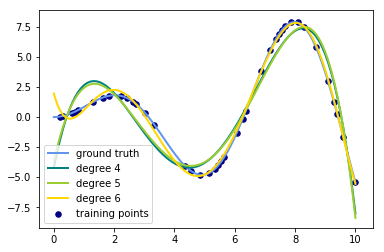

For regularization alpha = 1
Variance for degree 4 =  2.31
Variance for degree 5 =  1.47
Variance for degree 6 =  0.49


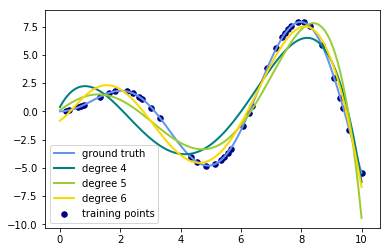

For regularization alpha = 10
Variance for degree 4 =  4.12
Variance for degree 5 =  1.65
Variance for degree 6 =  1.30


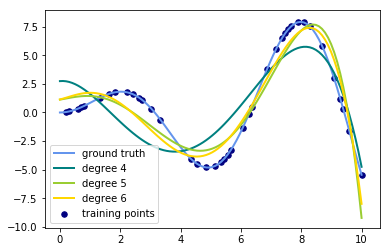

For regularization alpha = 100
Variance for degree 4 =  6.16
Variance for degree 5 =  1.89
Variance for degree 6 =  1.92


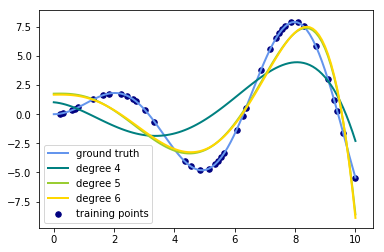

For regularization alpha = 1000
Variance for degree 4 =  10.16
Variance for degree 5 =  2.35
Variance for degree 6 =  2.34


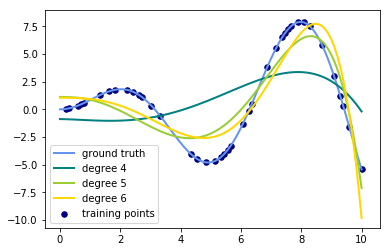

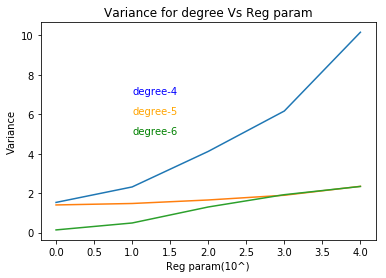

In [64]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:40])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]
colors = ['teal', 'yellowgreen', 'gold']
lw = 2
i = 0
V = np.zeros([5,3])
for alph in np.array([0, 1, 10, 100, 1000]):
    
    plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
    V_alph = np.zeros(3)
    plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")
    print("For regularization alpha = %d" %alph)
    for count, degree in enumerate([4, 5, 6]):
        model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha = alph))
        model.fit(X, y)
        
        y_plot = model.predict(X_plot)
        plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
                 label="degree %d" % degree)
        var = np.var(f(x_plot) - y_plot)
        V_alph[count] = var
        
        print("Variance for degree %d =  %0.2f" %(degree, var))
    plt.legend(loc='lower left')
    V[i, :] = V_alph
    i = i+1
    plt.show()
plt.title('Variance for degree Vs Reg param')
plt.xlabel('Reg param(10^)')
plt.ylabel('Variance')
plt.text(1, 7, r'degree-4', color='blue') 
plt.text(1, 6, r'degree-5', color='orange')
plt.text(1, 5, r'degree-6', color='green') 

plt.plot(V)
plt.show()

### Comments
We are increasing the regularization parameter(alpha) value from [0,1,10,100,1000] for the polynomial fit and observe the variance value increasing from the plot for each of the degrees. 

This shows that for all polynomial fits, by increasing variance value we can show that regularization reduces overfitting over training data .

### Q4 sklearn MLPClassifier on MNIST data

In [2]:
from mnist import MNIST
import numpy as np
import random
import time
import pandas as pd
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [3]:
mndata = MNIST('MNIST')

In [4]:
images_train, labels_train = mndata.load_training()
images_test, labels_test = mndata.load_testing()
images_train  = np.asarray(images_train)/255
images_test  = np.asarray(images_test)/255
labels_train = np.asarray(labels_train)
labels_test = np.asarray(labels_test)

### 4a Time for training and selecting best parameters based on grid search

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier(hidden_layer_sizes=(200), max_iter=100, alpha=1e-4,
                    solver='sgd', verbose=0, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
start = time.clock()
mlp.fit(images_train, labels_train)
end = time.clock()

print("Time for training on MLP classifier: %0.3f" %(end-start) )
print("Test set score: %f" % mlp.score(images_test, labels_test))

Time for training on MLP classifier: 67.551
Test set score: 0.982400


### Performing grid search on type of solver and regularization value

In [75]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier(hidden_layer_sizes=(200), max_iter=100, alpha=1e-4,
                    solver='sgd', verbose=0, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

params = {'solver': ['sgd','adam'], 'alpha' :[1e-4, 1e-3, 1e-2]} 
clf = GridSearchCV(mlp, params, cv =2)
clf.fit(images_train, labels_train)

mlp.fit(images_train, labels_train)
print("Training set score: %f" % mlp.score(images_train, labels_train))
print("Test set score: %f" % mlp.score(images_test, labels_test))


Training set score: 1.000000
Test set score: 0.982400


### Output of best parameters and test accuracy for those parameters

In [76]:
print('Finished with grid search with best mean cross-validated score:', clf.best_score_)
print('Best params appeared to be', clf.best_params_)

clf1 = clf.best_estimator_

print('Test accuracy:', clf1.score(images_test, labels_test))

Finished with grid search with best mean cross-validated score: 0.974016666667
Best params appeared to be {'alpha': 0.001, 'solver': 'sgd'}
Test accuracy: 0.9829


### Comments
I performed grid search with changing solver =[adam, sgd] and alpha = [1e-4, 1e-3, 1e-2] and observed the best fit for sgd solver and regularization(alpha) value of 1e-3 with accuracy of 0.9829. I kept hidden layer size to be 200 and maximum iteration of 100. 

I chose these parameters as this gave the best accuracy from grid search.

### 4b. Using above parameters and plotting accuracies for different hidden layer node sizes

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
params = {'hidden_layer_sizes': [ (50,), (100,), (200,), (256,), (512,)]}

mlp = MLPClassifier(hidden_layer_sizes=(200), max_iter=100, alpha=1e-3,
                    solver='sgd', verbose=0, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
clf = GridSearchCV(mlp, params, cv =2)
clf.fit(images_train, labels_train)
print('Finished with grid search with best mean cross-validated score:', clf.best_score_)
print('Best params appeared to be', clf.best_params_)

clf1 = clf.best_estimator_

print('Test accuracy:', clf1.score(images_test, labels_test))

Finished with grid search with best mean cross-validated score: 0.9751
Best params appeared to be {'hidden_layer_sizes': (512,)}
Test accuracy: 0.9837


### Plot of accuracy vs hidden layer size based on above grid search

Test score for hidden layer sizes: [ 0.966       0.97086667  0.97401667  0.97465     0.9751    ]


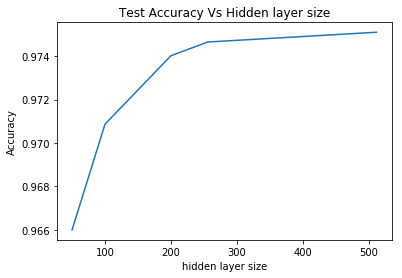

In [52]:
data = clf.cv_results_['mean_test_score']
print("Test score for hidden layer sizes:", data)
hlayer_size = [50,100,200,256,512]
plt.plot(hlayer_size, data)
plt.xlabel('hidden layer size')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Vs Hidden layer size')
plt.show()


### Plot of accuracy vs hidden layer size based on testing on test images set after training on train set

Test set score: 0.974600
Test set score: 0.979400
Test set score: 0.982900
Test set score: 0.982800
Test set score: 0.983700


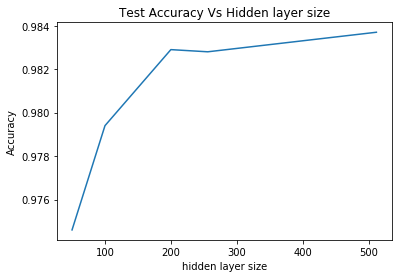

In [57]:
test_score =[]
for size in np.array([50,100,200,256,512]):   
    mlp = MLPClassifier(hidden_layer_sizes=(size), max_iter=100, alpha=1e-3,
                        solver='sgd', verbose=0, tol=1e-4, random_state=1,
                        learning_rate_init=.1)

    mlp.fit(images_train, labels_train)
    score = mlp.score(images_test, labels_test)
    print("Test set score: %f" %score )
    test_score.append(score)
    
hlayer_size = [50,100,200,256,512]
plt.plot(hlayer_size, np.array(test_score))
plt.xlabel('hidden layer size')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Vs Hidden layer size')
plt.show()


### Comments
From the above first plot it can be seen that test accuracy increases with increase in size of nodes of hidden layer for the grid search algorithm. Accuracy went up from 0.966 for 50 nodes to 0.9751 for 512.

Similarly when i applied the same hidden layer size parameters for test images set after training on train images we see the same trend of accuracy increase for increase in hidden layer size.
#### The best accuracy we get is 0.9837 for alpha = 1e-3 and hidden layer size =(512,)

### 4c Accuracy and training time for MLP when compared with other classifiers

In [59]:
import pandas
Classifier = ["KNN","Naive Bayes","Logistic Regression","SVM","MLP",]
Acc = ["Accuracy", "Time(min)"]
Values = np.array([[97.05,81.91,86.16,96.7,98.37] , [106, 0.1, 50, 600, 1.1]])
pandas.DataFrame(Values.T, Classifier, Acc)


,Accuracy,Time(min)
KNN,97.05,106.0
Naive Bayes,81.91,0.1
Logistic Regression,86.16,50.0
SVM,96.70,600.0
MLP,98.37,1.1


### Comments
From above accuracy table it can be seen that MLP has best accuracy followed by KNN, SVM, Logistic Regression and lastly Naive Bayes. 

Naive bayes trains fastest on training data followed by MLP, logistic regression, KNN and lastly SVM. Naive bayes and MLP train in order of seconds while logistic takes near to one hour. Note that SVM was performed using rbf kernel with subset of 10000 samples from total 60000 which took training time of approximately 40min. If we have used total training set, time must have gone up to 8-12hrs. All other classifiers were performed with total 60000 samples.